# Imports & Read Data

In [3]:
import os
os.chdir('..')
from src.feature_engineering import freture_extract_All
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Show more columns
pd.set_option('display.max_columns', None) 

# Show more rows
pd.set_option('display.max_rows', 100) 

In [4]:
df = freture_extract_All()
df

,member_id,churn,outreach,months_in_app,title_Cardio workouts,title_Cardiometabolic health,title_Cholesterol friendly foods,title_Diabetes management,title_Exercise routines,title_HbA1c targets,title_Healthy eating guide,title_High-fiber meals,title_Hypertension basics,title_Lowering blood pressure,title_Meditation guide,title_Mediterranean diet,title_Restorative sleep tips,title_Sleep hygiene,title_Strength training basics,title_Stress reduction,title_Weight management,total_visits,app_usage,icd_code_A09,icd_code_B34.9,icd_code_E11.9,icd_code_H10.9,icd_code_I10,icd_code_J00,icd_code_K21.9,icd_code_M54.5,icd_code_R51,icd_code_Z71.3,code_count,priority_condition_count
0,1,0,0,13,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,0.0,0.0,1.0,0.0,1.0,4.0,0.0,1.0,0.0,2.0,9.0,4.0
1,2,0,0,2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,9.0,10.0,0.0,0.0,3.0,0.0,2.0,0.0,1.0,0.0,1.0,2.0,9.0,7.0
2,3,0,0,8,3.0,1.0,1.0,0.0,3.0,1.0,0.0,1.0,1.0,2.0,3.0,3.0,3.0,1.0,0.0,0.0,0.0,52.0,9.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,4.0,1.0
3,4,1,0,13,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,15.0,10.0,1.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,5.0,3.0
4,5,0,1,14,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,11.0,10.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,7.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,0,0,8,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,18.0,8.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,9.0,4.0
9996,9997,0,0,15,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,8.0,11.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,5.0,3.0
9997,9998,0,0,8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,12.0,0.0,2.0,0.0,2.0,0.0,4.0,2.0,1.0,1.0,2.0,14.0,2.0
9998,9999,0,0,16,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,36.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,3.0,6.0,3.0


## Visualize pattern of churn

[Text(0, 0, '0.21'), Text(0, 0, '0.19')]

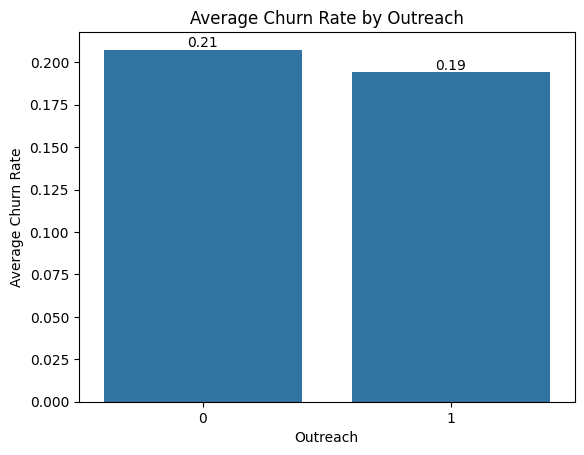

In [4]:
outreach_effect = df.groupby('outreach').agg({'churn': 'mean'}).reset_index()
ax = sns.barplot(data=outreach_effect, x='outreach', y='churn')
ax.set_xlabel('Outreach')
ax.set_ylabel('Average Churn Rate')
ax.set_title('Average Churn Rate by Outreach')
ax.bar_label(ax.containers[0], fmt='%.2f')

In [5]:
from scipy.stats import chi2_contingency
import numpy as np

contingency_table = np.array([
    [1248, 6016-1248], 
    [773, 3984-773]    
])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Significant at α=0.05: {p_value < 0.05}")

Chi-square statistic: 2.594510608271912
P-value: 0.10723455830188673
Significant at α=0.05: False


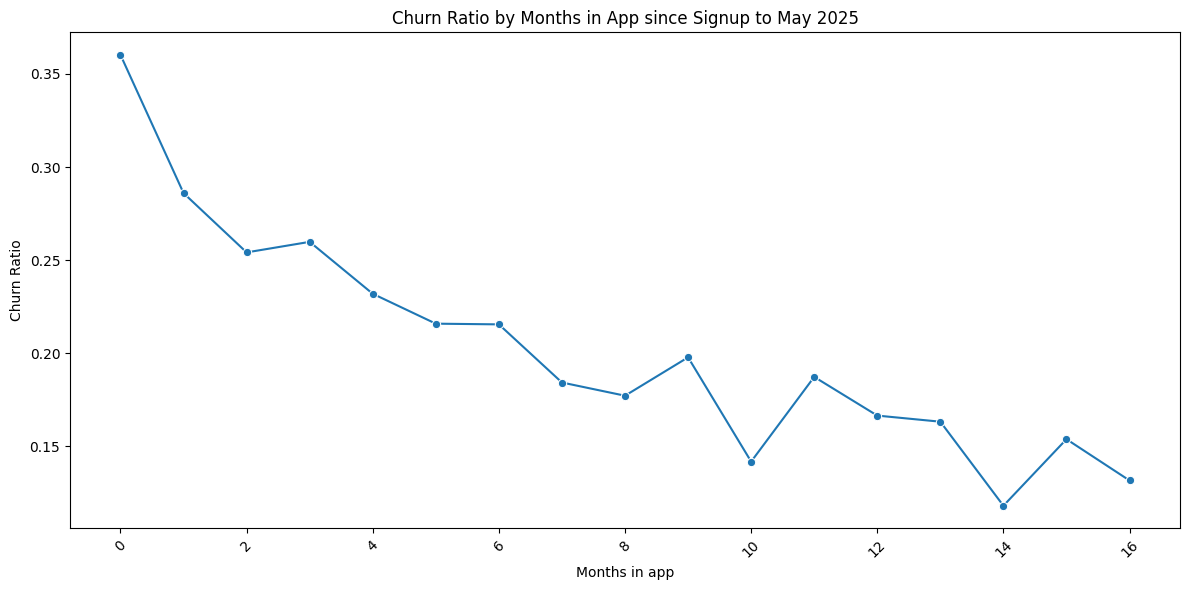

In [6]:
# Calculate churn ratio by year-month
churn_by_month = df.groupby('months_in_app').agg(
    churn_ratio=('churn', 'mean'),
    total_members=('member_id', 'count')
).reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=churn_by_month, x='months_in_app', y='churn_ratio', marker='o')
plt.xticks(rotation=45)
plt.title('Churn Ratio by Months in App since Signup to May 2025')
plt.ylabel('Churn Ratio')
plt.xlabel('Months in app')
plt.tight_layout()
plt.show()

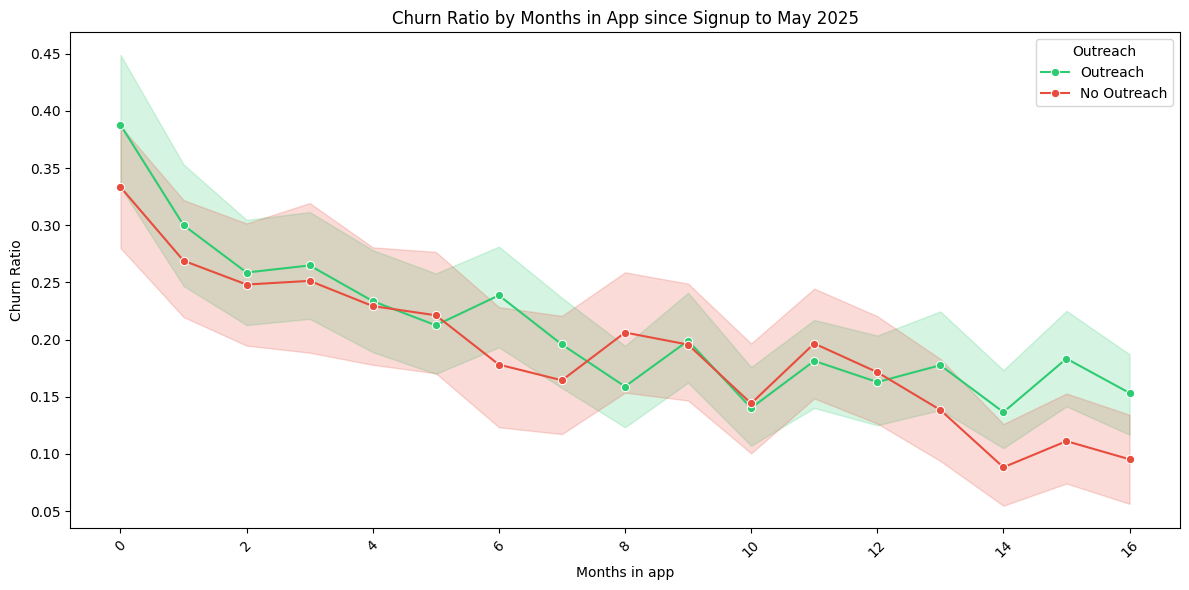

In [7]:
# Plot with confidence interval - separate lines for outreach
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='months_in_app', y='churn', hue='outreach', marker='o', 
             errorbar='ci', err_style='band',
             palette={True: '#e74c3c', False: '#2ecc71'})  # Custom colors
plt.xticks(rotation=45)
plt.title('Churn Ratio by Months in App since Signup to May 2025')
plt.ylabel('Churn Ratio')
plt.xlabel('Months in app')
# Get current legend and update labels
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Outreach', 'No Outreach'], title='Outreach')
plt.tight_layout()
plt.show()

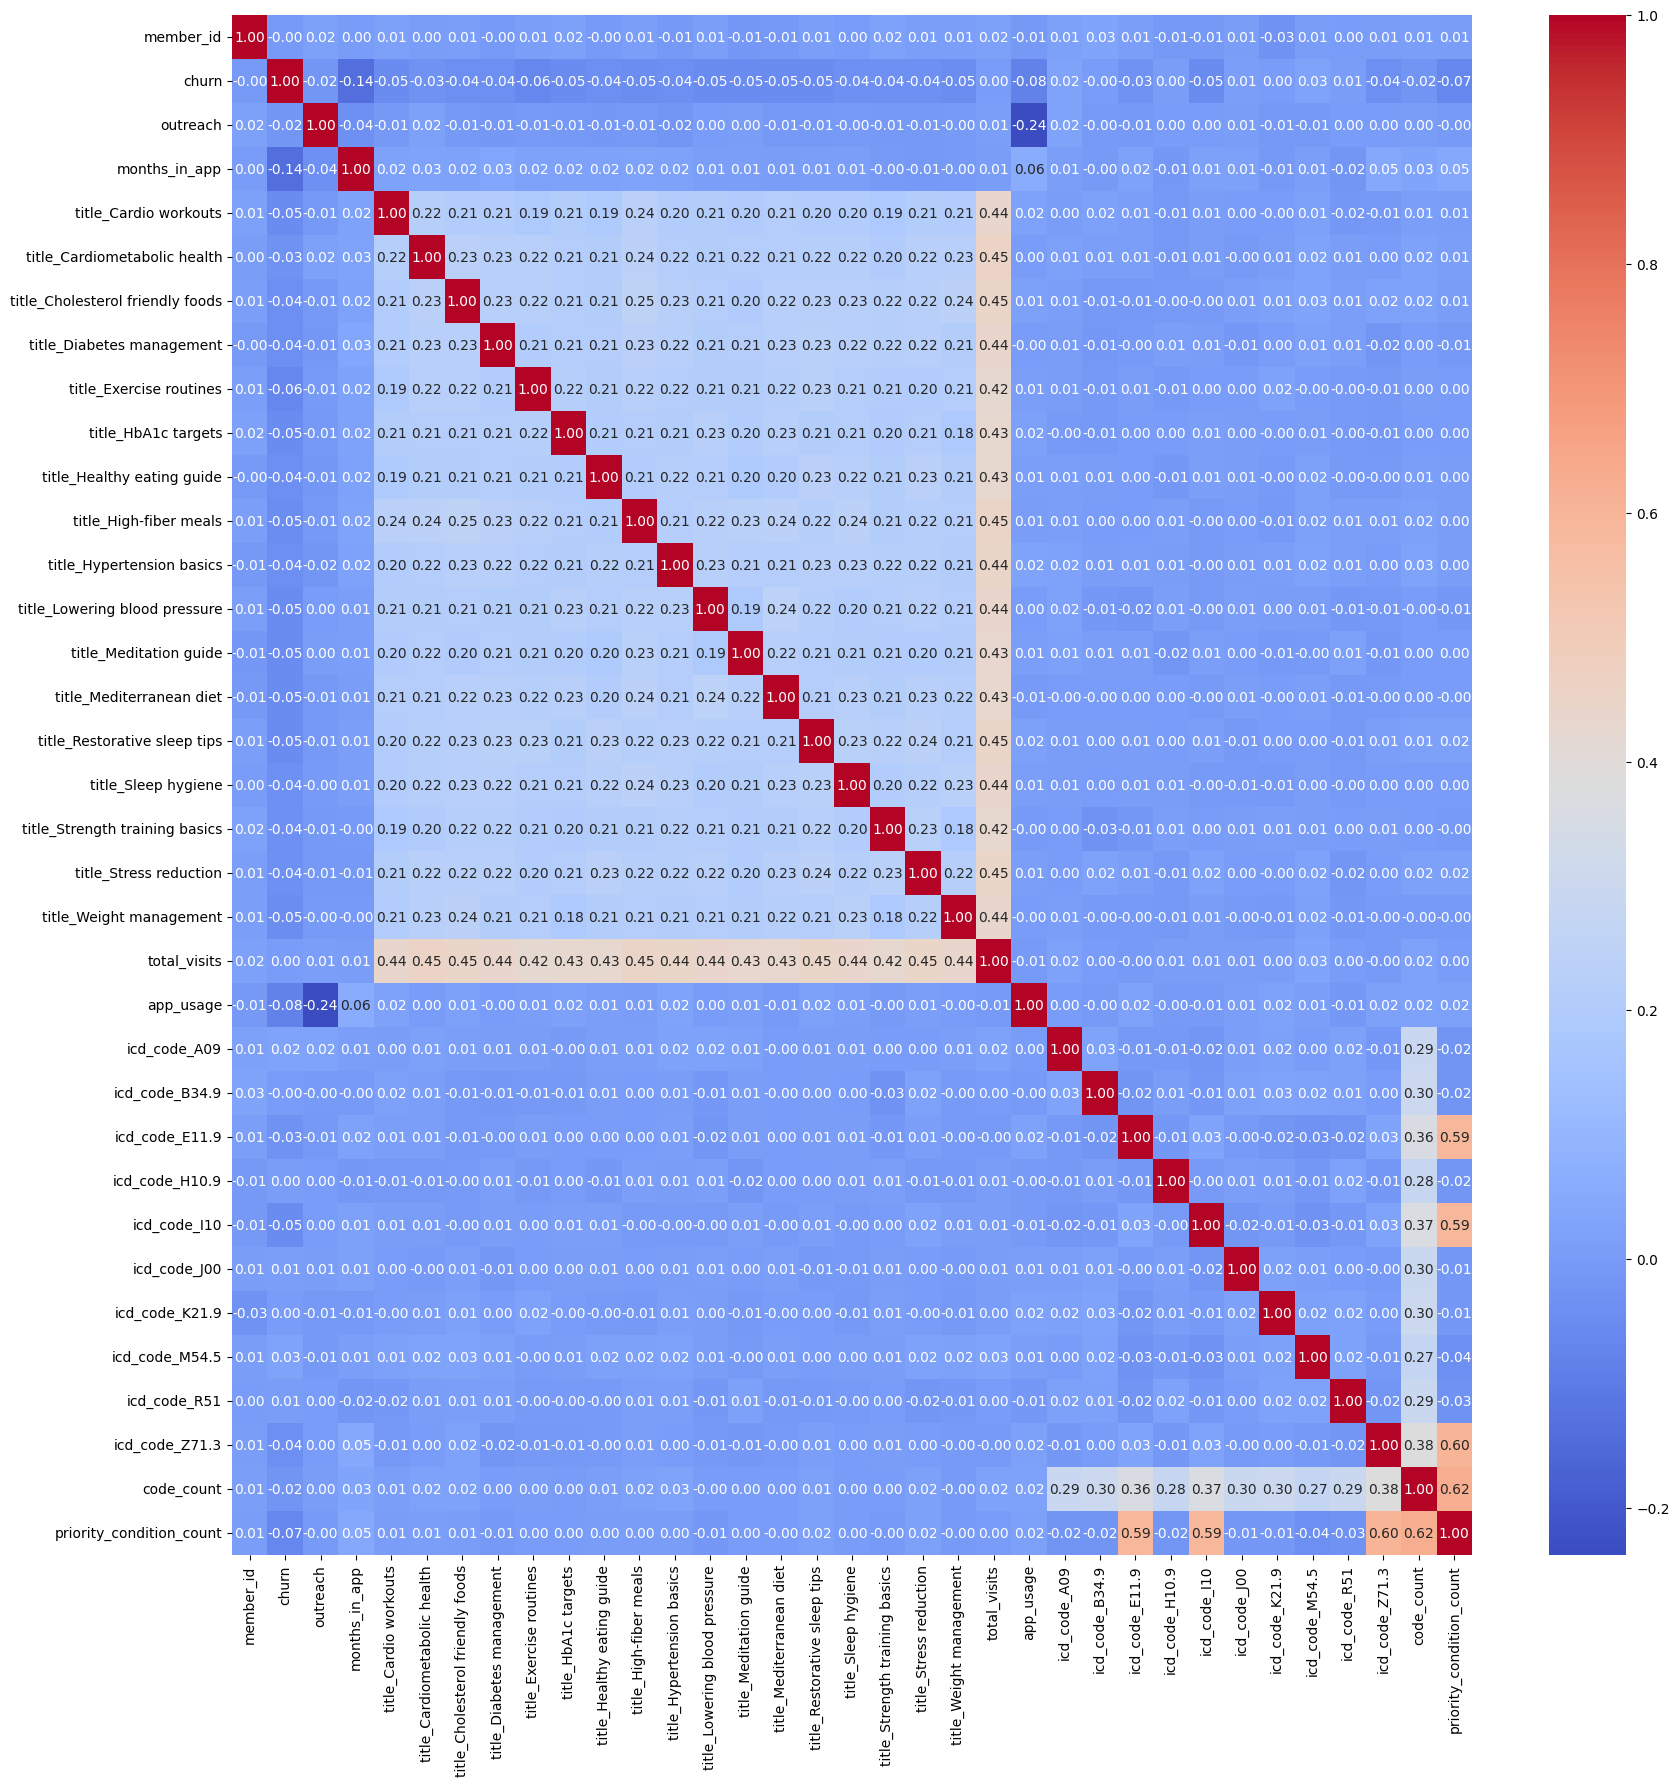

In [8]:
plt.figure(figsize=(20, 20))  # width, height in inches
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

## explore app usage

In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\omerg\AppData\Local\Temp\ipykernel_3172\2637039069.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_ranges = df.groupby('usage_bin')['usage_interval'].first()
C:\Users\omerg\AppData\Local\Temp\ipykernel_3172\2637039069.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_usage = df.groupby(['usage_bin', 'outreach']).agg(


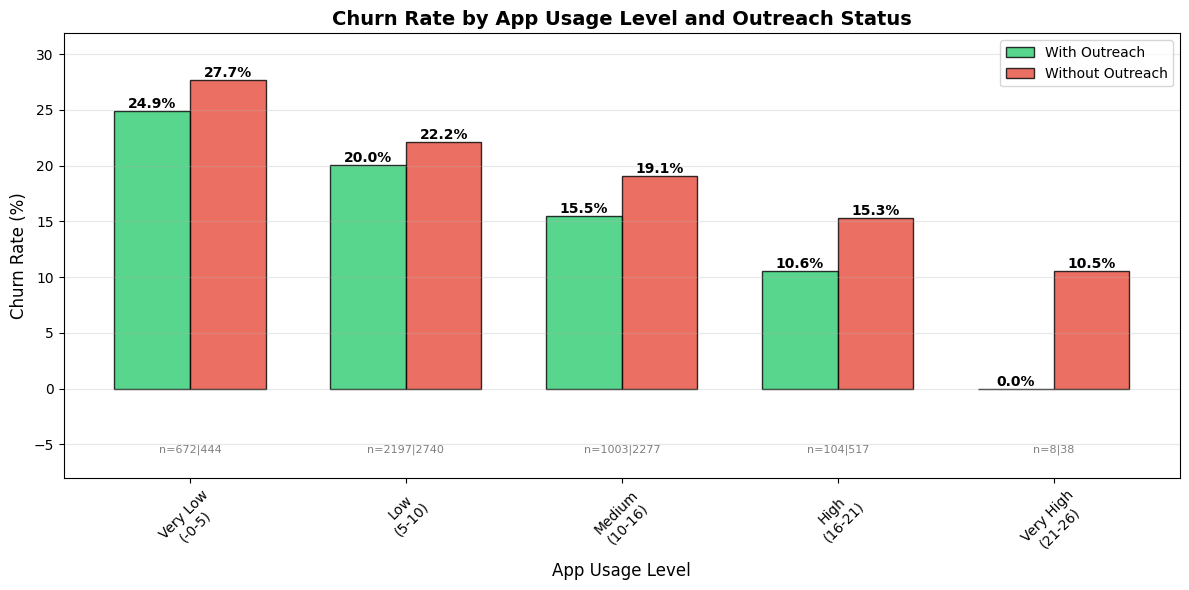

In [10]:
# Create bins and get the intervals
df['usage_bin'] = pd.cut(df['app_usage'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
df['usage_interval'] = pd.cut(df['app_usage'], bins=5)

# Create a mapping of labels to their actual ranges
bin_ranges = df.groupby('usage_bin')['usage_interval'].first()
usage_labels_with_ranges = [f"{label}\n({interval.left:.0f}-{interval.right:.0f})" 
                             for label, interval in bin_ranges.items()]

churn_by_usage = df.groupby(['usage_bin', 'outreach']).agg(
    churn_rate=('churn', 'mean'),
    member_count=('member_id', 'count')
).reset_index()

churn_by_usage['churn_rate'] = churn_by_usage['churn_rate'] * 100

with_outreach = churn_by_usage[churn_by_usage['outreach'] == True]
without_outreach = churn_by_usage[churn_by_usage['outreach'] == False]

x = np.arange(len(with_outreach))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - width/2, with_outreach['churn_rate'], width, 
               label='With Outreach', color='#2ecc71', edgecolor='black', alpha=0.8)
bars2 = ax.bar(x + width/2, without_outreach['churn_rate'], width,
               label='Without Outreach', color='#e74c3c', edgecolor='black', alpha=0.8)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

for i in range(len(x)):
    count_with = with_outreach.iloc[i]['member_count']
    count_without = without_outreach.iloc[i]['member_count']
    ax.text(i, -5, f'n={count_with}|{count_without}', 
            ha='center', va='top', fontsize=8, color='gray')

ax.set_xlabel('App Usage Level', fontsize=12)
ax.set_ylabel('Churn Rate (%)', fontsize=12)
ax.set_title('Churn Rate by App Usage Level and Outreach Status', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(usage_labels_with_ranges)  # Use labels with ranges
ax.set_ylim(bottom=-8, top=max(churn_by_usage['churn_rate']) * 1.15)
ax.legend()
plt.xticks(rotation=45)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\omerg\AppData\Local\Temp\ipykernel_3172\3053214788.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_ranges = df.groupby('usage_bin')['usage_interval'].first()
C:\Users\omerg\AppData\Local\Temp\ipykernel_3172\3053214788.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_usage = df.groupby(['usage_bin', 'outreach']).agg(


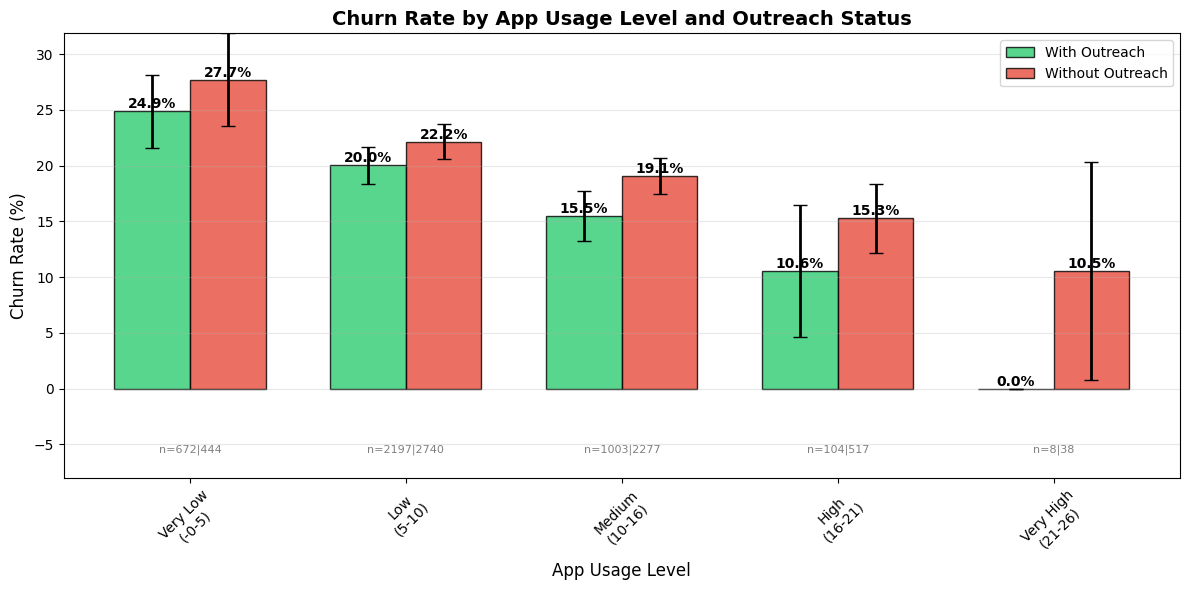

In [11]:
from scipy import stats

# Create bins and get the intervals
df['usage_bin'] = pd.cut(df['app_usage'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
df['usage_interval'] = pd.cut(df['app_usage'], bins=5)

# Create a mapping of labels to their actual ranges
bin_ranges = df.groupby('usage_bin')['usage_interval'].first()
usage_labels_with_ranges = [f"{label}\n({interval.left:.0f}-{interval.right:.0f})" 
                             for label, interval in bin_ranges.items()]

churn_by_usage = df.groupby(['usage_bin', 'outreach']).agg(
    churn_rate=('churn', 'mean'),
    member_count=('member_id', 'count')
).reset_index()

churn_by_usage['churn_rate'] = churn_by_usage['churn_rate'] * 100

# Calculate 95% confidence intervals
def calculate_ci(row):
    p = row['churn_rate'] / 100  # Convert back to proportion
    n = row['member_count']
    if n > 0:
        se = np.sqrt(p * (1 - p) / n)
        ci = 1.96 * se * 100  # Convert back to percentage
        return ci
    return 0

churn_by_usage['ci'] = churn_by_usage.apply(calculate_ci, axis=1)

with_outreach = churn_by_usage[churn_by_usage['outreach'] == True]
without_outreach = churn_by_usage[churn_by_usage['outreach'] == False]

x = np.arange(len(with_outreach))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - width/2, with_outreach['churn_rate'], width, 
               label='With Outreach', color='#2ecc71', edgecolor='black', alpha=0.8,
               yerr=with_outreach['ci'], capsize=5, error_kw={'linewidth': 2})
bars2 = ax.bar(x + width/2, without_outreach['churn_rate'], width,
               label='Without Outreach', color='#e74c3c', edgecolor='black', alpha=0.8,
               yerr=without_outreach['ci'], capsize=5, error_kw={'linewidth': 2})

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

for i in range(len(x)):
    count_with = with_outreach.iloc[i]['member_count']
    count_without = without_outreach.iloc[i]['member_count']
    ax.text(i, -5, f'n={count_with}|{count_without}', 
            ha='center', va='top', fontsize=8, color='gray')

ax.set_xlabel('App Usage Level', fontsize=12)
ax.set_ylabel('Churn Rate (%)', fontsize=12)
ax.set_title('Churn Rate by App Usage Level and Outreach Status', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(usage_labels_with_ranges)
ax.set_ylim(bottom=-8, top=max(churn_by_usage['churn_rate']) * 1.15)
ax.legend()
plt.xticks(rotation=45)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [12]:
from scipy.stats import chi2_contingency

# Test for each usage level
print("Statistical Significance Tests by Usage Level:")
print("=" * 60)

for usage_level in df['usage_bin'].cat.categories:
    # Create contingency table
    subset = df[df['usage_bin'] == usage_level]
    contingency_table = pd.crosstab(subset['outreach'], subset['churn'])
    
    # Perform chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    print(f"\n{usage_level}:")
    print(f"  Chi-square statistic: {chi2:.4f}")
    print(f"  P-value: {p_value:.4f}")
    print(f"  Significant: {'YES' if p_value < 0.05 else 'NO'}")
    print(f"  Sample sizes: With={sum(subset['outreach'])}, Without={sum(~subset['outreach'])}")

Statistical Significance Tests by Usage Level:

Very Low:
  Chi-square statistic: 0.9869
  P-value: 0.3205
  Significant: NO
  Sample sizes: With=672, Without=-1788

Low:
  Chi-square statistic: 3.1721
  P-value: 0.0749
  Significant: NO
  Sample sizes: With=2197, Without=-7134

Medium:
  Chi-square statistic: 6.0446
  P-value: 0.0139
  Significant: YES
  Sample sizes: With=1003, Without=-4283

High:
  Chi-square statistic: 1.1895
  P-value: 0.2754
  Significant: NO
  Sample sizes: With=104, Without=-725

Very High:
  Chi-square statistic: 0.0730
  P-value: 0.7871
  Significant: NO
  Sample sizes: With=8, Without=-54


C:\Users\omerg\AppData\Local\Temp\ipykernel_3172\1275876687.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_ranges = df.groupby('usage_bin')['usage_interval'].first()
C:\Users\omerg\AppData\Local\Temp\ipykernel_3172\1275876687.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_usage = df.groupby(['usage_bin', 'outreach']).agg(


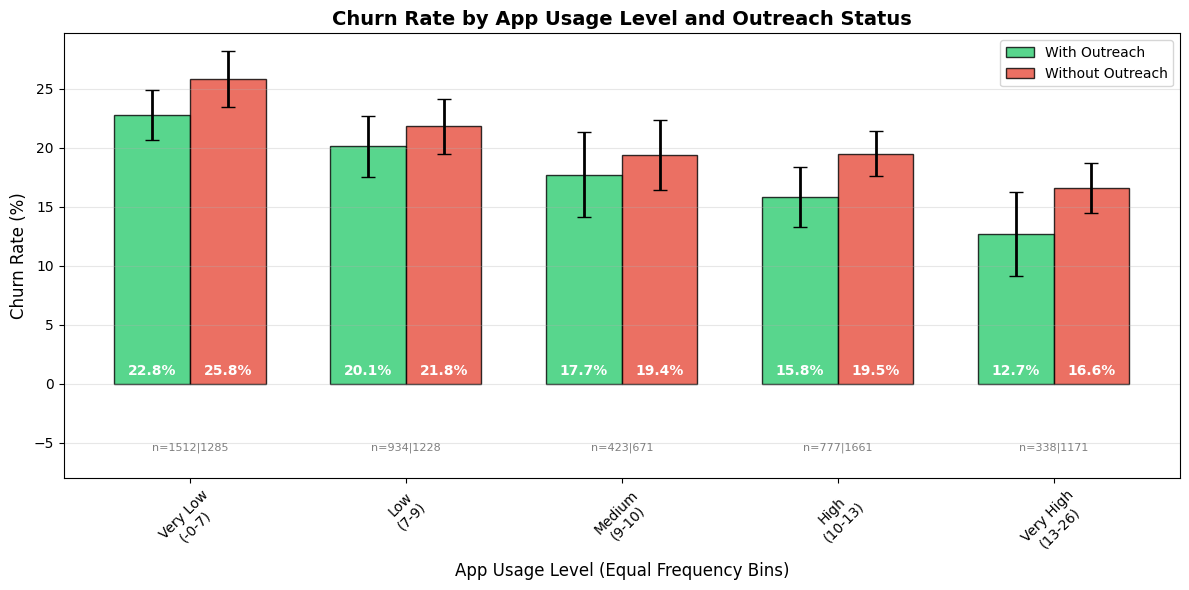

In [13]:
from scipy import stats

# Create bins by frequency (quantiles) instead of equal width
df['usage_bin'] = pd.qcut(df['app_usage'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'], duplicates='drop')
df['usage_interval'] = pd.qcut(df['app_usage'], q=5, duplicates='drop')

# Create a mapping of labels to their actual ranges
bin_ranges = df.groupby('usage_bin')['usage_interval'].first()
usage_labels_with_ranges = [f"{label}\n({interval.left:.0f}-{interval.right:.0f})" 
                             for label, interval in bin_ranges.items()]

churn_by_usage = df.groupby(['usage_bin', 'outreach']).agg(
    churn_rate=('churn', 'mean'),
    member_count=('member_id', 'count')
).reset_index()

churn_by_usage['churn_rate'] = churn_by_usage['churn_rate'] * 100

# Calculate 95% confidence intervals
def calculate_ci(row):
    p = row['churn_rate'] / 100  # Convert back to proportion
    n = row['member_count']
    if n > 0:
        se = np.sqrt(p * (1 - p) / n)
        ci = 1.96 * se * 100  # Convert back to percentage
        return ci
    return 0

churn_by_usage['ci'] = churn_by_usage.apply(calculate_ci, axis=1)

with_outreach = churn_by_usage[churn_by_usage['outreach'] == True]
without_outreach = churn_by_usage[churn_by_usage['outreach'] == False]

x = np.arange(len(with_outreach))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - width/2, with_outreach['churn_rate'], width, 
               label='With Outreach', color='#2ecc71', edgecolor='black', alpha=0.8,
               yerr=with_outreach['ci'], capsize=5, error_kw={'linewidth': 2})
bars2 = ax.bar(x + width/2, without_outreach['churn_rate'], width,
               label='Without Outreach', color='#e74c3c', edgecolor='black', alpha=0.8,
               yerr=without_outreach['ci'], capsize=5, error_kw={'linewidth': 2})

# Add percentage labels at the base of bars
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., 0.5,
            f'{height:.1f}%',
            ha='center', va='bottom', fontsize=10, fontweight='bold', color='white')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., 0.5,
            f'{height:.1f}%',
            ha='center', va='bottom', fontsize=10, fontweight='bold', color='white')

# Add sample size info below x-axis
for i in range(len(x)):
    count_with = with_outreach.iloc[i]['member_count']
    count_without = without_outreach.iloc[i]['member_count']
    ax.text(i, -5, f'n={count_with}|{count_without}', 
            ha='center', va='top', fontsize=8, color='gray')

ax.set_xlabel('App Usage Level (Equal Frequency Bins)', fontsize=12)
ax.set_ylabel('Churn Rate (%)', fontsize=12)
ax.set_title('Churn Rate by App Usage Level and Outreach Status', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(usage_labels_with_ranges)
ax.set_ylim(bottom=-8, top=max(churn_by_usage['churn_rate']) * 1.15)
ax.legend()
plt.xticks(rotation=45)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [14]:
from scipy.stats import chi2_contingency

# Perform chi-square test for each usage bin
print("Statistical Significance Tests by Usage Level (Frequency-Based Bins):")
print("=" * 70)

significance_results = []

for usage_level in df['usage_bin'].cat.categories:
    subset = df[df['usage_bin'] == usage_level]
    
    # Create contingency table
    contingency_table = pd.crosstab(subset['outreach'], subset['churn'])
    
    # Perform chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Get churn rates for each group
    with_outreach = subset[subset['outreach'] == True]
    without_outreach = subset[subset['outreach'] == False]
    
    churn_rate_with = with_outreach['churn'].mean() * 100 if len(with_outreach) > 0 else 0
    churn_rate_without = without_outreach['churn'].mean() * 100 if len(without_outreach) > 0 else 0
    difference = churn_rate_with - churn_rate_without
    
    # Determine significance marker
    if p_value < 0.001:
        sig_marker = '***'
        sig_text = 'Very Highly Significant'
    elif p_value < 0.01:
        sig_marker = '**'
        sig_text = 'Highly Significant'
    elif p_value < 0.05:
        sig_marker = '*'
        sig_text = 'Significant'
    else:
        sig_marker = 'ns'
        sig_text = 'Not Significant'
    
    significance_results.append({
        'usage_level': usage_level,
        'p_value': p_value,
        'sig_marker': sig_marker
    })
    
    print(f"\n{usage_level}:")
    print(f"  P-value:          {p_value:.4f}")
    print(f"  Result:           {sig_text} {sig_marker}")

# Overall test
print("\n" + "=" * 70)
print("OVERALL TEST (Across All Usage Levels):")
print("=" * 70)

overall_table = pd.crosstab(df['outreach'], df['churn'])
chi2, p_value, dof, expected = chi2_contingency(overall_table)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"Degrees of freedom:   {dof}")
print(f"P-value:              {p_value:.6f}")
print(f"Result:               {'Outreach has a SIGNIFICANT effect on churn' if p_value < 0.05 else 'No significant effect detected'}")

print("\nOverall Churn Rates:")
overall_stats = df.groupby('outreach')['churn'].agg(['mean', 'count'])
overall_stats['mean'] = overall_stats['mean'] * 100
overall_stats.columns = ['Churn Rate (%)', 'Count']
print(overall_stats)

print("\n" + "=" * 70)
print("Significance Legend: *** p<0.001, ** p<0.01, * p<0.05, ns = not significant")

Statistical Significance Tests by Usage Level (Frequency-Based Bins):

Very Low:
  P-value:          0.0636
  Result:           Not Significant ns

Low:
  P-value:          0.3659
  Result:           Not Significant ns

Medium:
  P-value:          0.5493
  Result:           Not Significant ns

High:
  P-value:          0.0332
  Result:           Significant *

Very High:
  P-value:          0.1038
  Result:           Not Significant ns

OVERALL TEST (Across All Usage Levels):
Chi-square statistic: 2.5945
Degrees of freedom:   1
P-value:              0.107235
Result:               No significant effect detected

Overall Churn Rates:
          Churn Rate (%)  Count
outreach                       
0              20.744681   6016
1              19.402610   3984

Significance Legend: *** p<0.001, ** p<0.01, * p<0.05, ns = not significant


# Explore claimes

In [15]:
claims = df.drop(columns=[x for x in df.columns if 'title_' in x])
claims

,member_id,churn,outreach,months_in_app,total_visits,app_usage,icd_code_A09,icd_code_B34.9,icd_code_E11.9,icd_code_H10.9,icd_code_I10,icd_code_J00,icd_code_K21.9,icd_code_M54.5,icd_code_R51,icd_code_Z71.3,code_count,priority_condition_count,usage_bin,usage_interval
0,1,0,0,13,3.0,6.0,0.0,0.0,1.0,0.0,1.0,4.0,0.0,1.0,0.0,2.0,9.0,4.0,Very Low,"(-0.001, 7.0]"
1,2,0,0,2,9.0,10.0,0.0,0.0,3.0,0.0,2.0,0.0,1.0,0.0,1.0,2.0,9.0,7.0,Medium,"(9.0, 10.0]"
2,3,0,0,8,52.0,9.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,4.0,1.0,Low,"(7.0, 9.0]"
3,4,1,0,13,15.0,10.0,1.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,5.0,3.0,Medium,"(9.0, 10.0]"
4,5,0,1,14,11.0,10.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,7.0,4.0,Medium,"(9.0, 10.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,0,0,8,18.0,8.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,9.0,4.0,Low,"(7.0, 9.0]"
9996,9997,0,0,15,8.0,11.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,5.0,3.0,High,"(10.0, 13.0]"
9997,9998,0,0,8,8.0,12.0,0.0,2.0,0.0,2.0,0.0,4.0,2.0,1.0,1.0,2.0,14.0,2.0,High,"(10.0, 13.0]"
9998,9999,0,0,16,36.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,3.0,6.0,3.0,Very Low,"(-0.001, 7.0]"


In [16]:
icd_cols = [col for col in claims.columns if col.startswith('icd_code')]
claims[icd_cols] = (claims[icd_cols] > 0).astype(int)
claims

,member_id,churn,outreach,months_in_app,total_visits,app_usage,icd_code_A09,icd_code_B34.9,icd_code_E11.9,icd_code_H10.9,icd_code_I10,icd_code_J00,icd_code_K21.9,icd_code_M54.5,icd_code_R51,icd_code_Z71.3,code_count,priority_condition_count,usage_bin,usage_interval
0,1,0,0,13,3.0,6.0,0,0,1,0,1,1,0,1,0,1,9.0,4.0,Very Low,"(-0.001, 7.0]"
1,2,0,0,2,9.0,10.0,0,0,1,0,1,0,1,0,1,1,9.0,7.0,Medium,"(9.0, 10.0]"
2,3,0,0,8,52.0,9.0,0,0,1,0,0,0,1,1,0,0,4.0,1.0,Low,"(7.0, 9.0]"
3,4,1,0,13,15.0,10.0,1,0,0,0,1,1,0,0,0,0,5.0,3.0,Medium,"(9.0, 10.0]"
4,5,0,1,14,11.0,10.0,0,0,1,0,1,0,1,1,0,1,7.0,4.0,Medium,"(9.0, 10.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,0,0,8,18.0,8.0,1,1,1,0,0,1,0,0,1,1,9.0,4.0,Low,"(7.0, 9.0]"
9996,9997,0,0,15,8.0,11.0,0,0,1,0,0,0,1,0,1,1,5.0,3.0,High,"(10.0, 13.0]"
9997,9998,0,0,8,8.0,12.0,0,1,0,1,0,1,1,1,1,1,14.0,2.0,High,"(10.0, 13.0]"
9998,9999,0,0,16,36.0,7.0,0,0,0,0,0,0,1,1,0,1,6.0,3.0,Very Low,"(-0.001, 7.0]"


In [17]:
from scipy.stats import chi2_contingency
import pandas as pd

# Get all ICD code columns
icd_cols = df.filter(like='icd_code').columns

results = []
for col in icd_cols:
    # Create contingency table
    contingency = pd.crosstab(df[col], df['churn'])
    
    # Perform chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency)
    
    # Calculate effect size (Cramér's V)
    n = contingency.sum().sum()
    cramers_v = (chi2 / n) ** 0.5
    
    results.append({
        'icd_code': col,
        'chi2': chi2,
        'p_value': p_value,
        'cramers_v': cramers_v,
        'significant': p_value < 0.05
    })

results_df = pd.DataFrame(results).sort_values('p_value')
print(results_df)

         icd_code       chi2   p_value  cramers_v  significant
4    icd_code_I10  31.388286  0.000021   0.056025         True
9  icd_code_Z71.3  23.062404  0.000776   0.048023         True
2  icd_code_E11.9  13.694878  0.033237   0.037007         True
0    icd_code_A09   9.046361  0.107229   0.030077        False
7  icd_code_M54.5   8.957411  0.110775   0.029929        False
8    icd_code_R51   6.783485  0.237247   0.026045        False
3  icd_code_H10.9   5.427231  0.365991   0.023296        False
5    icd_code_J00   4.421464  0.490460   0.021027        False
6  icd_code_K21.9   3.051110  0.549309   0.017467        False
1  icd_code_B34.9   2.897031  0.715857   0.017021        False


                With Condition  Without Condition  Difference
icd_code_A09          0.206166           0.196042    0.010124
icd_code_B34.9        0.197385           0.203174   -0.005789
icd_code_E11.9        0.203043           0.212864   -0.009821
icd_code_H10.9        0.198973           0.202705   -0.003732
icd_code_I10          0.204337           0.220763   -0.016426
icd_code_J00          0.206349           0.198744    0.007605
icd_code_K21.9        0.206007           0.200067    0.005940
icd_code_M54.5        0.207722           0.194663    0.013059
icd_code_R51          0.212151           0.198590    0.013561
icd_code_Z71.3        0.191299           0.222222   -0.030923


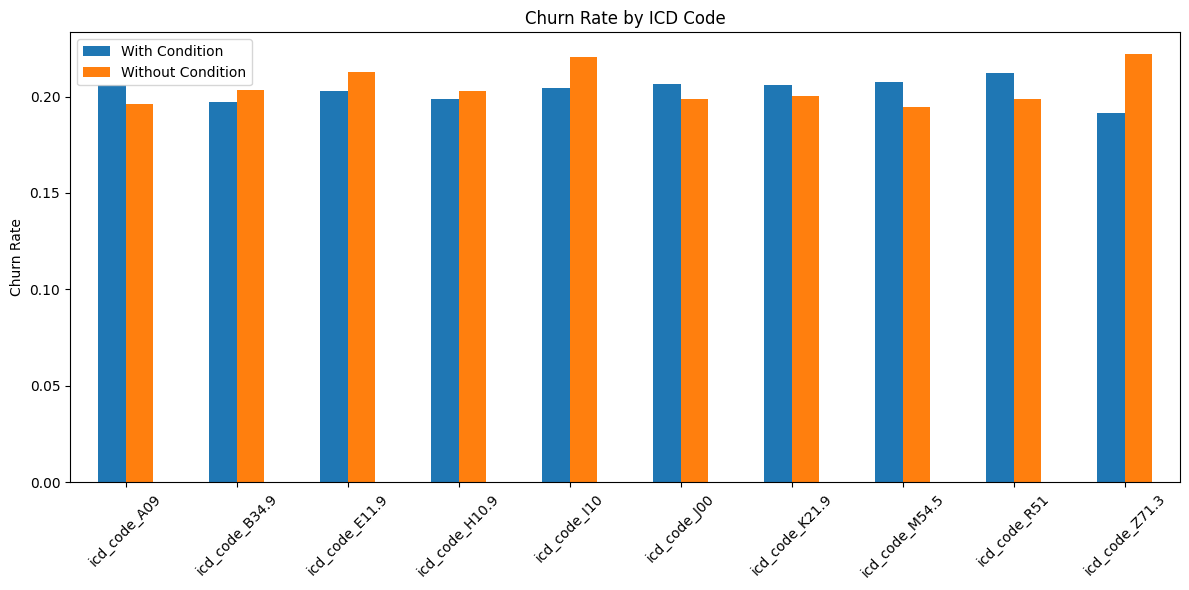

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate churn rate for each ICD code
icd_cols = df.filter(like='icd_code').columns
churn_rates = {}

for col in icd_cols:
    churn_rate_with = df[df[col] == 1]['churn'].mean()
    churn_rate_without = df[df[col] == 0]['churn'].mean()
    
    churn_rates[col] = {
        'With Condition': churn_rate_with,
        'Without Condition': churn_rate_without,
        'Difference': churn_rate_with - churn_rate_without
    }

churn_df = pd.DataFrame(churn_rates).T
print(churn_df)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
churn_df[['With Condition', 'Without Condition']].plot(kind='bar', ax=ax)
plt.title('Churn Rate by ICD Code')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.legend(['With Condition', 'Without Condition'])
plt.tight_layout()
plt.show()

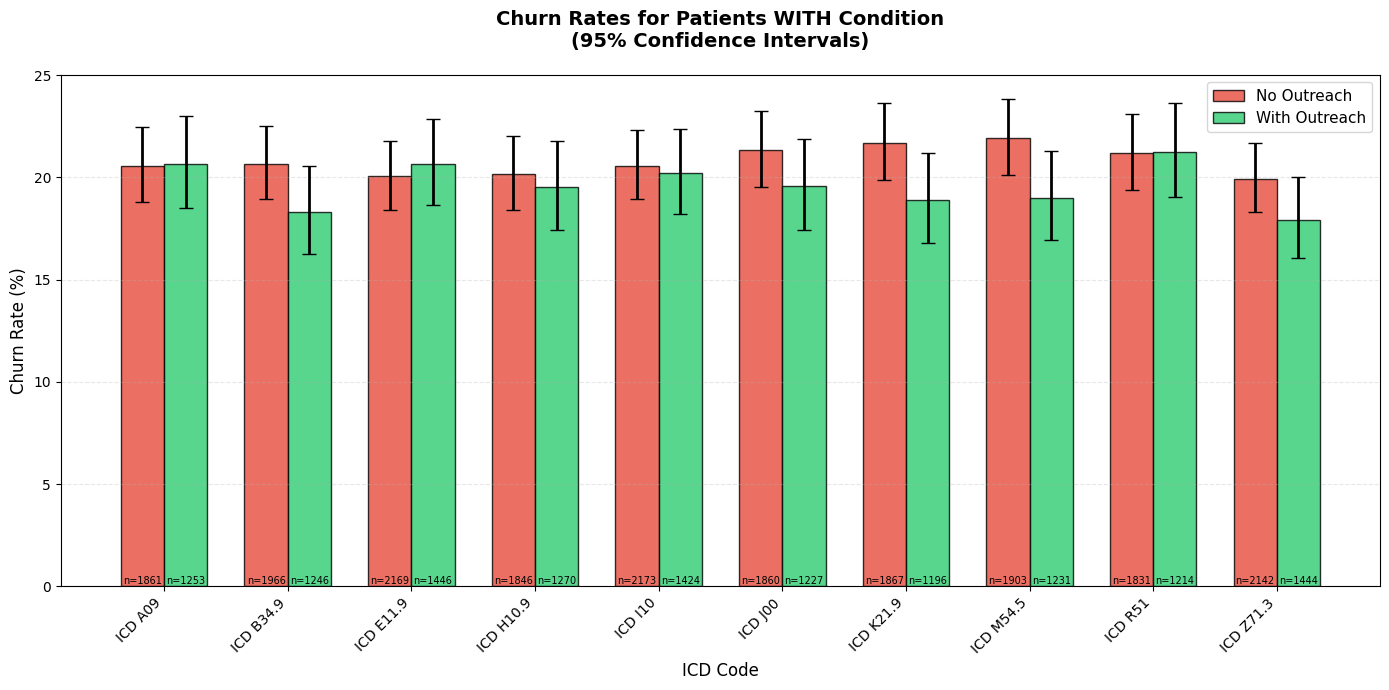


Data with Confidence Intervals:
 ICD Code         Group  Churn Rate  CI Lower  CI Upper    N
  ICD A09   No Outreach   20.580333 18.805014 22.476857 1861
  ICD A09 With Outreach   20.670391 18.519521 23.000550 1253
ICD B34.9   No Outreach   20.651068 18.919770 22.496835 1966
ICD B34.9 With Outreach   18.298555 16.250178 20.541806 1246
ICD E11.9   No Outreach   20.055325 18.423815 21.792716 2169
ICD E11.9 With Outreach   20.677732 18.669308 22.841538 1446
ICD H10.9   No Outreach   20.151679 18.384642 22.042685 1846
ICD H10.9 With Outreach   19.527559 17.440617 21.798289 1270
  ICD I10   No Outreach   20.570640 18.923735 22.321412 2173
  ICD I10 With Outreach   20.224719 18.219835 22.389818 1424
  ICD J00   No Outreach   21.344086 19.542059 23.264235 1860
  ICD J00 With Outreach   19.559902 17.436886 21.872926 1227
ICD K21.9   No Outreach   21.692555 19.882164 23.619195 1867
ICD K21.9 With Outreach   18.896321 16.778558 21.213250 1196
ICD M54.5   No Outreach   21.912769 20.111843 23.826

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.proportion import proportion_confint

def plot_outreach_effect_with_ci(df, churn_col='churn', outreach_col='outreach', confidence=0.95):
    """Visualize outreach effect with confidence intervals"""
    
    icd_cols = df.filter(like='icd_code').columns
    
    data = []
    for col in icd_cols:
        # With condition
        with_cond = df[df[col] == 1]
        
        # No outreach group
        no_outreach = with_cond[with_cond[outreach_col] == 0]
        n_no_outreach = len(no_outreach)
        churn_no_outreach = no_outreach[churn_col].sum()
        rate_no_outreach = churn_no_outreach / n_no_outreach if n_no_outreach > 0 else 0
        ci_low_no, ci_high_no = proportion_confint(churn_no_outreach, n_no_outreach, 
                                                     alpha=1-confidence, method='wilson')
        
        # With outreach group
        with_outreach = with_cond[with_cond[outreach_col] == 1]
        n_with_outreach = len(with_outreach)
        churn_with_outreach = with_outreach[churn_col].sum()
        rate_with_outreach = churn_with_outreach / n_with_outreach if n_with_outreach > 0 else 0
        ci_low_with, ci_high_with = proportion_confint(churn_with_outreach, n_with_outreach,
                                                        alpha=1-confidence, method='wilson')
        
        data.append({
            'ICD Code': col.replace('icd_code_', 'ICD '),
            'Group': 'No Outreach',
            'Churn Rate': rate_no_outreach * 100,
            'CI Lower': ci_low_no * 100,
            'CI Upper': ci_high_no * 100,
            'N': n_no_outreach
        })
        
        data.append({
            'ICD Code': col.replace('icd_code_', 'ICD '),
            'Group': 'With Outreach',
            'Churn Rate': rate_with_outreach * 100,
            'CI Lower': ci_low_with * 100,
            'CI Upper': ci_high_with * 100,
            'N': n_with_outreach
        })
    
    plot_df = pd.DataFrame(data)
    
    # Create plot
    fig, ax = plt.subplots(figsize=(14, 7))
    
    icd_codes = plot_df['ICD Code'].unique()
    x = np.arange(len(icd_codes))
    width = 0.35
    
    # Separate data by group
    no_outreach_data = plot_df[plot_df['Group'] == 'No Outreach']
    with_outreach_data = plot_df[plot_df['Group'] == 'With Outreach']
    
    # Calculate error bars (distance from mean to CI bounds)
    no_outreach_errors = [
        no_outreach_data['Churn Rate'].values - no_outreach_data['CI Lower'].values,
        no_outreach_data['CI Upper'].values - no_outreach_data['Churn Rate'].values
    ]
    
    with_outreach_errors = [
        with_outreach_data['Churn Rate'].values - with_outreach_data['CI Lower'].values,
        with_outreach_data['CI Upper'].values - with_outreach_data['Churn Rate'].values
    ]
    
    # Create bars with error bars and custom colors
    bars1 = ax.bar(x - width/2, no_outreach_data['Churn Rate'], width, 
                   label='No Outreach', alpha=0.8, capsize=5,
                   yerr=no_outreach_errors, error_kw={'linewidth': 2},
                   color='#e74c3c', edgecolor='black')
    
    bars2 = ax.bar(x + width/2, with_outreach_data['Churn Rate'], width,
                   label='With Outreach', alpha=0.8, capsize=5,
                   yerr=with_outreach_errors, error_kw={'linewidth': 2},
                   color='#2ecc71', edgecolor='black')
    
    # Customize plot
    ax.set_title(f'Churn Rates for Patients WITH Condition\n({int(confidence*100)}% Confidence Intervals)', 
                 fontsize=14, fontweight='bold', pad=20)
    ax.set_ylabel('Churn Rate (%)', fontsize=12)
    ax.set_xlabel('ICD Code', fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(icd_codes, rotation=45, ha='right')
    ax.legend(fontsize=11)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Add sample sizes on bars
    for i, (bar, n) in enumerate(zip(bars1, no_outreach_data['N'])):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., 0,
                f'n={n}', ha='center', va='bottom', fontsize=7)
    
    for i, (bar, n) in enumerate(zip(bars2, with_outreach_data['N'])):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., 0,
                f'n={n}', ha='center', va='bottom', fontsize=7)
    
    plt.tight_layout()
    plt.show()
    
    return plot_df

# Create visualization with confidence intervals
plot_data_with_ci = plot_outreach_effect_with_ci(df)
print("\nData with Confidence Intervals:")
print(plot_data_with_ci.to_string(index=False))

# Conclusions from data:

* The time window of the activity recording data is 2 weeks from 2025-07-01 to 2025-07-14.
* The signup to the aplication is between 2024-01-01 and 2025-05-31. all the useres are regestered at least one month to the app.
* New users are more likly to churn.
* High usage client are less likely to churn and more effected from outreach. 
* The strongest correlation between churn and time in app. Explore more features are needed.